# Отбор признаков

**Дано:**   
$X$ - пространство объектов, $Y$ - пространство ответов;<br>
$X^l=\{x_i\}^n_{i=1}$, $y^n=\{y_i\}^n_{i=1}$ - обучающая выборка;<br>
$F=\{f_j: X\rightarrow D_j,\ j=1,\ldots,n\}$ - множество признаков;<br>
$\mu_J$ - метод обучения, использующий только признаки из $J\subseteq F$;<br>
$Q(J)=Q(\mu_J, X^l)$ - функционал качества;

**Найти:**   
$\min_J Q(J)$

<img src="overfit.png" style="width: 300px;"/>

![](overfitting.png)

## Алгоритм полного перебора

Перебрать всевозможные подмножества признаков и подсчитать на каждое значение качества функционала.

![](full.png)

_Идея_: нередко из всех признаков можно оставить несколько, которые будут содержать основную информацию о датасете. Можно последовательно рассматривать все больше и больше признаков и останавливаться, если на прошествии некоторого количества шагов не наблюдается сильного улучшения качества.

**Преимущества:**
* простая реализация;
* гарантированный результат;
* эффективен при небольшом числе информативных признаков.

**Недостатки:**
* ооочень долго работает;
* возникает переобучения от большого числа комбинаций.

## Алгоритм жадного добавления

На каждом шаге добавляем самый полезный признак. Отбор прекращается, если не наблюдается улучшение функционала на протяжении нескольких шагов.

**Преимущества:**
* быстро работает.
   
**Недостатки:**
* может быть подобрана неоптимальная комбинация.

## Алгоритм добавления-удаления

Проводим жадного добавления, потом жадное удаление. Повторяем, пока функционал качества не начнет стабилизироваться.

**Преимущества:**
* как правило, работает лучше, чем добавление и удаление по отдельности.
   
**Недостатки:**
* может быть подобрана неоптимальная комбинация.

##  Поиск в ширину

Действуем аналогично алгортиму жадного добавления, но следим не за лучшим набором, а за $B$ лучшими наборами.

**Преимущества:**
* трудоемкость - квадратична от числа признаков.
   
**Недостатки:**
* при больших $B$ сильно возрастает трудоемкость;
* может быть подобрана неоптимальная комбинация.

## Эволюционный алгоритм

$J\subseteq F$ - индивид.

$R_t=\{J_T^1,\ldots,J_T^{B_T}\}$ - поколение.

$\beta=(\beta_j)_{j=1}^n$, $\beta_j = [f_j\in J]$ - ген, кодирующий $J$.

Бинарная операция скрещивания $\beta=\beta'\times\beta''$:
$$\beta_j = \begin{cases} \beta_j', & \mbox{с вероятностью 1/2,} \\ \beta_j'', & \mbox{с вероятностью 1/2} \end{cases}$$

Унарная операция мутации $\beta=\sim\beta'$:
$$\beta_j = \begin{cases} 1-\beta_j', & \mbox{с вероятностью } p \\ \beta_j', & \mbox{с вероятностью } 1 - p \end{cases}$$

Действуем аналогично поиску в ширину, но создаем множества для следующей итерации путем скрещивания и мутаций:

$$
R_{t+1} = \{\sim(J'\times J'')\mid J', J''\in R_t\}\cup R_t.
$$

**Эвристики:**
* Скрещивать только лучшие индивиды.
* В случае стагнации увеличивать скорость мутаций.
* Увеличивать вероятности перехода признаков от более успешного родителя к потомку.
* Параллельно выращивается несколько изолированных популяций.

## Random Forest

Можно обучить на данных случайный лес и посмотреть на `feature_importances_`. Это показатель того, сколько мы выигрывали на каждом ветвлении для каждой переменной, усредненный по деревьям.

# Анализ чувствительности

**Дано:**   
$X$ - пространство объектов, $Y$ - пространство ответов;<br>
$y: X\rightarrow Y$ - некоторая функция;<br>
$F=\{f_j: X\rightarrow D_j,\ j=1,\ldots,n\}$ - множество признаков.<br>

**Найти:**   
Подмножество признаков, которое в большей степени влияет на ответ.

## Screening Indices (Morris Screening)    

В различных точках пространства вычисляются elementary effects (по сути производные по направлению)

$$
d_i(X_j)=\frac{y(x_{j,1}, \ldots, x_{j,i}+\delta_i, \ldots, x_{j,n}) - y(x_{j,1}, \ldots, x_{j,i}, \ldots, x_{j,n})}{\delta_i}
$$

Затем вычисляются индексы чувствительности:
$$
\mu_i = mean\big(\big\{\big|d_i(X_j)\big|\big\}\big);\\
\sigma_i = std\big(\big\{d_i(X_j)\big\}\big);
$$

* Работает даже на небольших выборках;
* Не учитывает взаимодействия переменных;
* Чувствителен к шуму.

![](morris.png)

## Sobol Indices

$$
S_i = \frac{Var\big(E(y\mid x_i)\big)}{Var\big(y\big)}
$$
$$
T_i = 1 - \frac{Var\big(E(y \mid x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n)\big)}{Var\big(y\big)}
$$


* Как правило, необходим большой бюджет для получения устойчивой оценки.

Индексы для [Sobol function](https://www.sfu.ca/~ssurjano/gfunc.html) с весами a = \{0; 0.5; 3; 9; 99; 99\}
![](sobol.png)

## Метод главных компонент

In [47]:
import numpy as np
import scipy as sp
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [6]:
def simple_plot():
    n_dots = 20
    k = 0.7
    np.random.seed(2)
    x = np.hstack([
        np.linspace(0, 1, n_dots // 2),
        np.linspace(1.5, 2.5, n_dots // 2)
    ]) + np.random.normal(scale=0.3, size=n_dots)
    plt.scatter(x, k * x + np.random.normal(scale=0.1, size=n_dots), s=50, c=x>1);
    x_ends = np.array([-1, 3])
    plt.plot(x_ends, k * x_ends, c='g')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2');

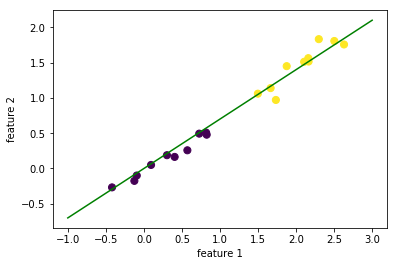

In [9]:
%matplotlib inline
simple_plot()

Пусть $X$ - **центрированная** *матрица объект-признак* размера $(l\times n)$. 

**PCA**

Запишем *матрицу ковариаций* $C=X^TX\big/(l-1)$. Она симметрична, поэтому ее можно представить в виде:
$$
C = VLV^T,
$$
где $V$ - *матрица собственных векторов* матрицы *C* (записаны по столбцам), где $L$ - диагональная *матрица собственных значений*, причем значения расположены в убывающем порядке.    
Столбцы матрицы $V$ называются *главными направлениями*.     
Проекции исходных данных на эти направления называются *главными компонентами* - их можно рассматривать как новые переменные.    
$j$-ая главная компонента есть $j$-ый столбец матрицы $XV$.    
Новые координаты $i$-ого объекта есть $i$-ая строка матрицы $XV$.

![](pca.gif)

**SVD**

Запишем разложение $X$.

$$
X = USV^T,
$$
где $S$ - матрица сингулярных значений. В этом случае *матрица главных компонент* есть $XV = US$.
SVD-разложение связано с PCA следующим образом:

$$
C = (USV^T)^T(USV^T)\big/(l-1) = V\frac{S^2}{l-1}V^T,
$$
поэтому
$$
\lambda_i=\frac{s_i^2}{l-1}
$$

![](svd.gif)

In [26]:
n_dots = 300
x = np.random.normal(loc=0., scale=2., size=n_dots)
y = np.random.normal(loc=0., scale=1., size=n_dots)
markers = np.vstack([np.zeros(n_dots), np.ones(n_dots)])
x_new = np.random.normal(loc=7., scale=2., size=n_dots)
y_new = np.random.normal(loc=7., scale=2., size=n_dots)
x_3d = np.hstack([x, x_new])
y_3d = np.hstack([y, y_new])
z_3d = np.hstack([y, y_new + 5]) + np.random.normal(loc=0., scale=0.3, size=2*n_dots)
data = np.vstack([x_3d, y_3d, z_3d]).T
scale(data, with_mean=True, with_std=False, copy=False);

<IPython.core.display.Javascript object>


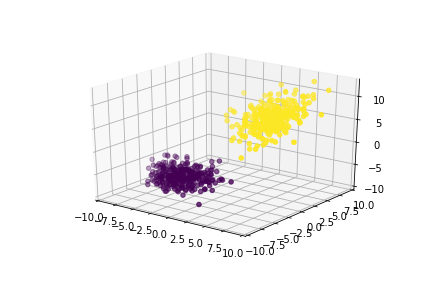

In [30]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*data.T, c=markers)
plt.xlim(-10, 10)
plt.ylim(-10, 10);

In [33]:
pca = PCA(n_components=2)
pca.fit(data)
components = pca.components_

<IPython.core.display.Javascript object>


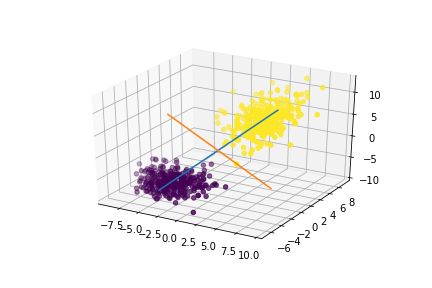

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*data.T, c=markers)
for i in range(2):
    ax.plot(*zip(-10 * components[i], 10 * components[i]))

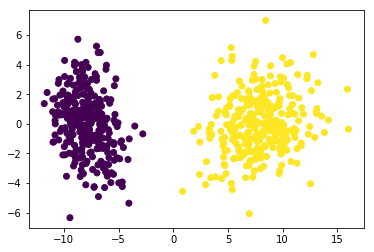

In [35]:
%matplotlib inline
new_data = pca.transform(data)
plt.scatter(*new_data.T, c=markers);

In [59]:
%matplotlib inline
img = misc.imread(r'france.jpg', mode='L')
imgplot = plt.imshow(img, cmap='Greys_r')

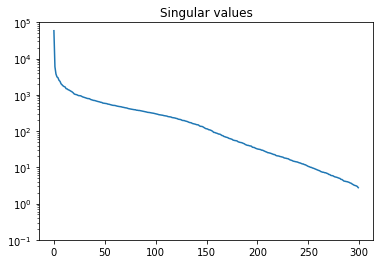

In [55]:
U, s, Vh = sp.linalg.svd(img)
plt.plot(s)
plt.yscale('log')
plt.ylim(10**(-1), 10**5)
plt.title('Singular values');

In [56]:
def str_range(some_range):
    return str(some_range[0] + 1) + '-' + str(some_range[-1] + 1)

def get_components(comp_range):
    A = np.zeros(img.shape)
    for i in comp_range:
        A += np.outer(U[:, i] * s[i], Vh[i, :])
    return A

comp_ranges = \
    [
        np.arange(0, 1),
        np.arange(0, 5),
        np.arange(0, 10),
        np.arange(0, 20), 
        np.arange(0, 60),
        np.arange(0, len(s)),
        np.arange(19, 100), 
        np.arange(19, len(s)),
        np.arange(99, len(s))
    ]

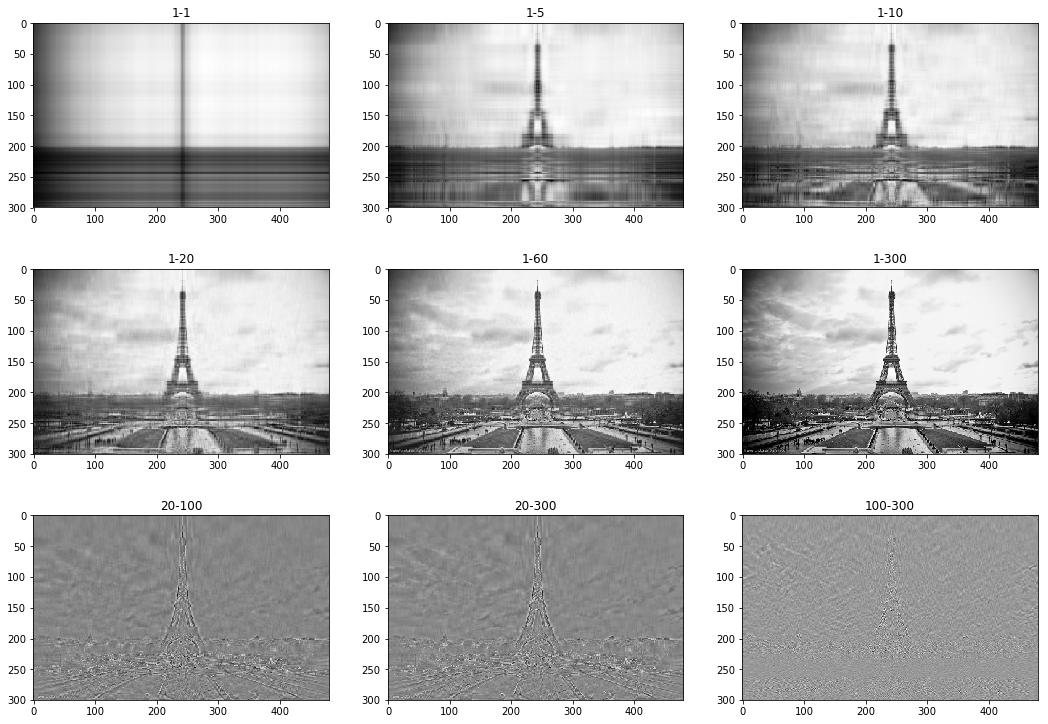

In [57]:
fig = plt.figure(figsize=(18, 40))
for i, comp_range in enumerate(comp_ranges):
    ax = fig.add_subplot(len(comp_ranges), 3, i + 1)
    ax.set_title(str_range(comp_range))
    A = get_components(comp_range)
    plt.imshow(A, cmap='Greys_r')